In [ ]:
!pip install sentence-transformers -q
!pip install git+https://github.com/Bots-Avatar/ExplainitAll -q

In [ ]:
from sentence_transformers import SentenceTransformer
from explainitall.embedder_interp.embd_interpret import ModelInterp
from explainitall.QA.extractive_qa_sbert.SVDBert import SVDBertModel
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model_distil = SentenceTransformer("FractalGPT/SbertDistil")

model_svd = SentenceTransformer('FractalGPT/SbertSVDDistil')
model_svd[0].auto_model = SVDBertModel.from_pretrained('FractalGPT/SbertSVDDistil')

model_orig = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
model_mp = SentenceTransformer("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

In [ ]:
interp_distil = ModelInterp(model_distil)
interp_svd = ModelInterp(model_svd)
interp_orig = ModelInterp(model_orig)
interp_mp = ModelInterp(model_mp)

In [ ]:
def sent_interp(interps, sent, names):
  '''Интерпретатор, анализ вклада слова в эмбеддинг'''

  plt.figure(figsize=(len(sent.split(' '))*1.5,4))

  for i, interp in enumerate(interps):
    q = interp.seq_interp(sent)
    plt.bar(q['words'], q['imp'], alpha=0.8, label=names[i])
  plt.xlabel("Слова", fontsize=15)
  plt.ylabel("Вклад в эбеддинг", fontsize=15)
  plt.legend(fontsize=13)
  plt.grid()



def clusters_interp(interp, clusters, name):
    '''Анализ влияния кластеров на эмбеддинг'''

    interp_stat = interp.clusters_interp(clusters)
    names = [cl['name'] for cl in interp_stat]
    sen =[cl['sensitivity'] for cl in interp_stat]
    energy = np.array([cl['mean'] for cl in interp_stat])
    energy /= energy.sum()

    f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
    ax1.set_title(name, fontsize=16)
    ax1.bar(names, sen)
    ax1.grid()

    ax2.bar(names, energy)
    ax2.grid()

    ax2.set_xlabel("Кластеры", fontsize=13)
    ax2.set_ylabel("Важность", fontsize=10)
    ax1.set_ylabel("Точность описания", fontsize=10)

In [ ]:
sent = 'Вероятно, её пионерами могли быть очень редкие, уникальные по поведению особи, наиболее толерантные к человеку'

clusters = [
    {'name': 'Животные', 'elements':['кошка', 'африканский слон', 'северный олень', 'заяц', 'опосум', 'собака', 'волк', 'медведь']},
    {'name': 'Коты', 'elements':['кошка', 'котенок', 'кот','сибирская кошка','персидская кошка']},
    {'name': 'Транспорт', 'elements':['самолет', 'вертолет', 'машина', 'катер', 'звездолет']},
    {'name': 'Грибы', 'elements':['водорослями', 'цианобактериями', 'фитопатогенные']},
    {'name': 'Связь', 'elements':['телефон', 'телеграф', 'рация', 'приемник', 'передатчик']},
    {'name': 'Имена', 'elements':['Андрей', 'Сергей', 'Игорь', 'Николай', 'Александр']}
]

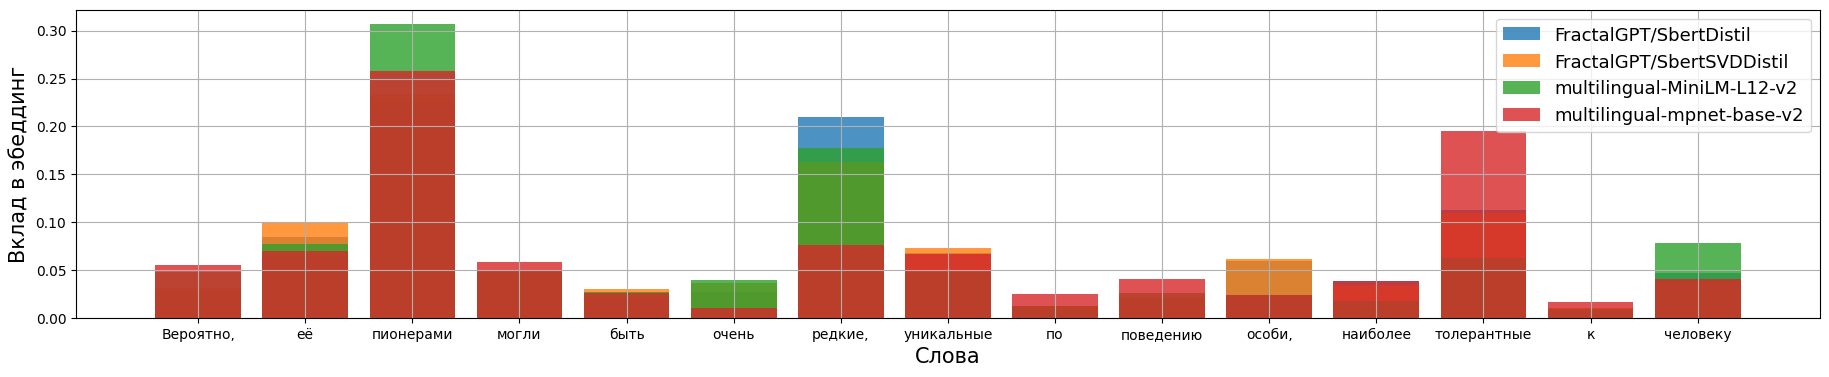

In [ ]:
interps = [interp_distil, interp_svd, interp_orig, interp_mp]
names = ['FractalGPT/SbertDistil', 'FractalGPT/SbertSVDDistil', 'multilingual-MiniLM-L12-v2', 'multilingual-mpnet-base-v2']
sent_interp(interps, sent, names)

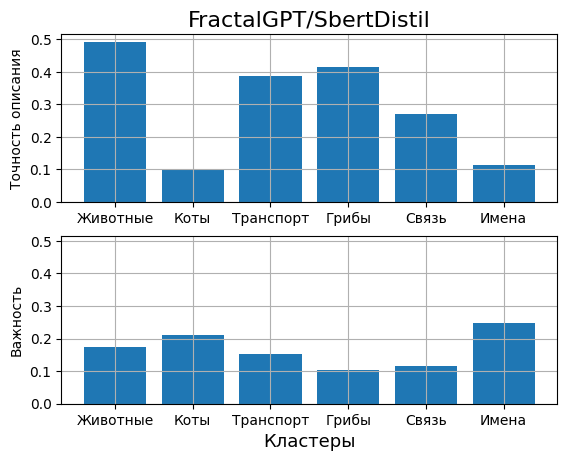

In [ ]:
clusters_interp(interps[0], clusters, names[0])

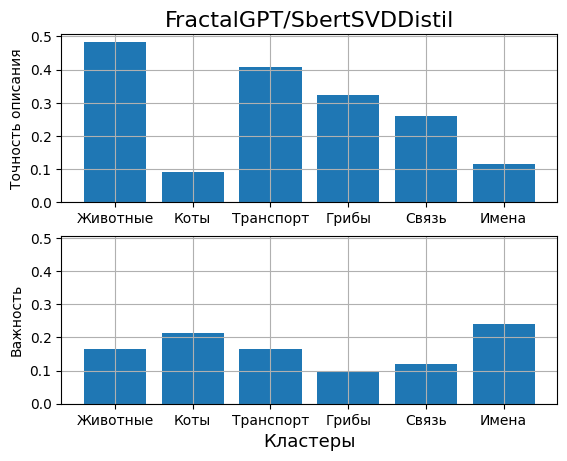

In [ ]:
clusters_interp(interps[1], clusters, names[1])

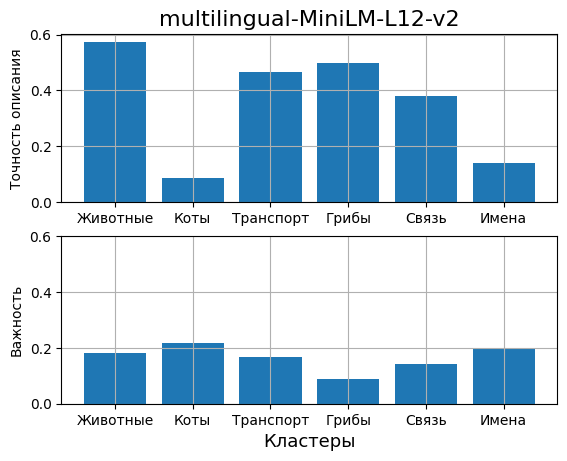

In [ ]:
clusters_interp(interps[2], clusters, names[2])

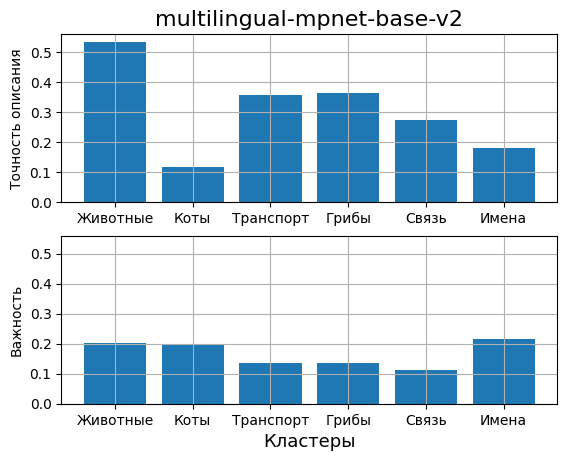

In [ ]:
clusters_interp(interps[3], clusters, names[3])